### Imports

### Splitting the data

In [1]:
# used for debugging
!pip install -Uqq ipdb
import ipdb
from google.colab import userdata
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!git clone https://github.com/MahdiTheGreat/LifeExpectancy.git
%cd LifeExpectancy

Cloning into 'LifeExpectancy'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 1.06 MiB | 2.94 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/LifeExpectancy


In [ ]:
%pdb on

Automatic pdb calling has been turned ON


In [32]:

from IPython.display import display
import math
import seaborn as sns

def data_explorer(df,max_columns=60,max_rows = 20, display_func=display):

  if not isinstance(df, pd.DataFrame):df=pd.DataFrame(df)
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)
  break_line="------------------------------------------------"
  print('data sample:')
  display_func(df)
  print(break_line)
  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_rows', None)
  print('data info:')
  display_func(df.info())
  print(break_line)
  # Check the general structure of the dataset
  print('data description:')
  display_func(df.describe())
  print(break_line)
  print('data nan check:')
  display_func(df.isna().sum())
  pd.set_option('display.max_columns',max_columns)
  pd.set_option('display.max_rows', max_rows)

data= pd.read_csv("life_expectancy.csv")
data_explorer(data)

data sample:


,Country,Year,"Mean Years of Schooling, female (years)","Share of seats in parliament, male (% held by men)",Mean Years of Schooling (years),Inequality in income,Carbon dioxide emissions per capita (production) (tonnes),"Expected Years of Schooling, male (years)",Expected Years of Schooling (years),"Labour force participation rate, female (% ages 15 and older)","Population with at least some secondary education, female (% ages 25 and older)","Expected Years of Schooling, female (years)","Adolescent Birth Rate (births per 1,000 women ages 15-19)",Material footprint per capita (tonnes),"Mean Years of Schooling, male (years)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)",Inequality in eduation,Gender Development Index (value),Coefficient of human inequality,"Labour force participation rate, male (% ages 15 and older)",Human Development Index (value),Gross National Income Per Capita (2017 PPP$),"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Change (thousands),Population Growth Rate (percentage),Population Annual Doubling Time (years),Births (thousands),Births by women aged 15 to 19 (thousands),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),Total Deaths (thousands),Male Deaths (thousands),Female Deaths (thousands),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)",Live births Surviving to Age 1 (thousands),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,Afghanistan,1990,0.342503,NaN,0.971125,NaN,0.209727,3.939093,2.504050,15.180,0.700485,1.970663,142.960,2.33,1.311020,5.419459,NaN,NaN,0.595,NaN,77.430,0.273,2684.550019,10845.924,10694.796,5348.387,5346.409,16.4714,100.0370,15.0917,363.742,32.974,-302.256,-2.826,NaN,567.256,83.530,51.423,7.5646,2.5937,29.880,105.5,203.514,110.102,93.412,18.449,45.9672,519.005,-666.001,-60.375
1,Afghanistan,1991,0.371860,NaN,1.019356,NaN,0.182525,4.171640,2.806550,15.214,0.772361,2.096679,147.525,2.28,1.385486,5.583395,NaN,NaN,0.588,NaN,77.176,0.279,2276.289409,10543.668,10745.167,5372.960,5372.208,16.5489,100.0140,15.0222,363.079,33.842,402.998,3.751,18.4790,555.610,83.643,51.788,7.6056,2.6403,29.812,105.6,192.531,104.274,88.257,17.946,46.6631,509.662,39.926,3.721
2,Afghanistan,1992,0.401218,NaN,1.067586,NaN,0.095233,4.417915,3.109050,15.223,0.844236,2.230753,147.521,2.35,1.459952,5.747332,NaN,NaN,0.586,NaN,76.871,0.287,2059.868084,10946.666,12057.433,6028.494,6028.938,18.5700,99.9926,14.9471,386.978,34.726,2221.534,18.477,3.7514,578.891,86.564,51.948,7.6648,2.7108,29.885,105.6,191.913,104.633,87.280,17.222,47.5955,532.989,1834.556,164.629
3,Afghanistan,1993,0.430575,NaN,1.115817,NaN,0.084285,4.678730,3.411550,15.197,0.916112,2.373401,147.896,2.10,1.534418,5.911269,NaN,NaN,0.548,NaN,76.580,0.297,1525.533426,13168.200,14003.760,7003.641,7000.119,21.5676,100.0503,14.8736,499.304,37.200,1671.120,11.948,5.8014,698.469,103.981,52.038,7.7186,2.8254,29.948,105.6,199.165,104.343,94.822,14.838,51.4664,646.635,1171.818,87.304
4,Afghanistan,1994,0.459933,NaN,1.164047,NaN,0.075054,4.954942,3.714050,15.178,0.987988,2.525171,155.669,1.83,1.608884,6.075205,NaN,NaN,0.524,NaN,76.330,0.292,1087.961890,14839.320,15455.554,7733.458,7722.096,23.8036,100.1471,14.7845,567.068,37.485,1232.469,7.979,8.6871,789.282,122.455,52.174,7.7165,2.8630,29.789,105.7,222.214,119.122,103.092,14.689,51.

------------------------------------------------
data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5553 entries, 0 to 5552
Data columns (total 50 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Country                                                                          5553 non-null   object 
 1   Year                                                                             5553 non-null   int64  
 2   Mean Years of Schooling, female (years)                                          5272 non-null   float64
 3   Share of seats in parliament, male (% held by men)                               5263 non-null   float64
 4   Mean Years of Schooling (years)                                                  5553 non-null   float64
 5   Inequality in income                                      

None

------------------------------------------------
data description:


,Year,"Mean Years of Schooling, female (years)","Share of seats in parliament, male (% held by men)",Mean Years of Schooling (years),Inequality in income,Carbon dioxide emissions per capita (production) (tonnes),"Expected Years of Schooling, male (years)",Expected Years of Schooling (years),"Labour force participation rate, female (% ages 15 and older)","Population with at least some secondary education, female (% ages 25 and older)","Expected Years of Schooling, female (years)","Adolescent Birth Rate (births per 1,000 women ages 15-19)",Material footprint per capita (tonnes),"Mean Years of Schooling, male (years)","Population with at least some secondary education, male (% ages 25 and older)","Share of seats in parliament, female (% held by women)",Inequality in eduation,Gender Development Index (value),Coefficient of human inequality,"Labour force participation rate, male (% ages 15 and older)",Human Development Index (value),Gross National Income Per Capita (2017 PPP$),"Total Population, as of 1 January (thousands)","Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)","Median Age, as of 1 July (years)","Natural Change, Births minus Deaths (thousands)","Rate of Natural Change (per 1,000 population)",Population Change (thousands),Population Growth Rate (percentage),Population Annual Doubling Time (years),Births (thousands),Births by women aged 15 to 19 (thousands),"Crude Birth Rate (births per 1,000 population)",Total Fertility Rate (live births per woman),Net Reproduction Rate (surviving daughters per woman),Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),Total Deaths (thousands),Male Deaths (thousands),Female Deaths (thousands),"Crude Death Rate (deaths per 1,000 population)","Life Expectancy at Birth, both sexes (years)",Live births Surviving to Age 1 (thousands),Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
count,5553.000000,5272.000000,5263.000000,5553.000000,1805.000000,5548.000000,5194.000000,5553.000000,5300.000000,5185.000000,5194.000000,5553.000000,4679.000000,5272.000000,5186.000000,5263.000000,1965.000000,4876.000000,1725.000000,5300.000000,5553.000000,5553.000000,5.553000e+03,5.553000e+03,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,4065.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000
mean,2006.407527,7.329082,83.226805,7.721285,23.413150,4.794938,12.246778,12.144108,50.240731,50.650944,12.225777,57.879278,15.160598,8.158566,56.778109,16.773195,18.944789,0.921398,19.269627,73.019821,0.669951,17373.287175,3.688237e+04,3.711360e+04,18667.076175,18446.524237,207.971428,101.007395,26.125438,461.571950,14.438580,462.452656,1.413137,47.154752,760.079901,88.753454,23.039611,3.050318,1.336000,28.776684,105.227120,298.507951,159.879669,138.628290,8.601031,69.055750,734.789664,0.880036,-0.185379
std,9.032749,3.579831,11.072464,3.271488,10.050090,6.548047,3.015263,3.330159,16.199127,29.948429,3.828967,45.696337,15.079047,3.068543,27.405447,11.072464,14.472672,0.082859,10.042396,8.843259,0.164806,19573.539080,1.358659e+05,1.365579e+05,69976.449544,66595.771494,717.008827,17.707363,8.544969,1625.736829,11.024385,1595.065756,1.947928,27.812510,2562.598938,327.118342,11.378031,1.598479,0.593845,1.549604,2.361906,1009.808119,549.178773,461.495123,3.486491,9.200514,2467.630772,192.239758,15.734229
min,1990.000000,0.100000,42.452830,0.290000,5.845034,0.015895,2.633210,2.059570,5.995000,0.420000,1.420440,1.493000,0.260000,0.500000,2.050000,0.000000,0.550110,0.485000,4.352563,40.590000,0.216000,416.032660,9.098000e+00,9.182000e+00,4.410000,4.773000,1.387800,81.884600,13.528

------------------------------------------------
data nan check:


,0
Country,0
Year,0
"Mean Years of Schooling, female (years)",281
"Share of seats in parliament, male (% held by men)",290
Mean Years of Schooling (years),0
Inequality in income,3748
Carbon dioxide emissions per capita (production) (tonnes),5
"Expected Years of Schooling, male (years)",359
Expected Years of Schooling (years),0
"Labour force participation rate, female (% ages 15 and older)",253


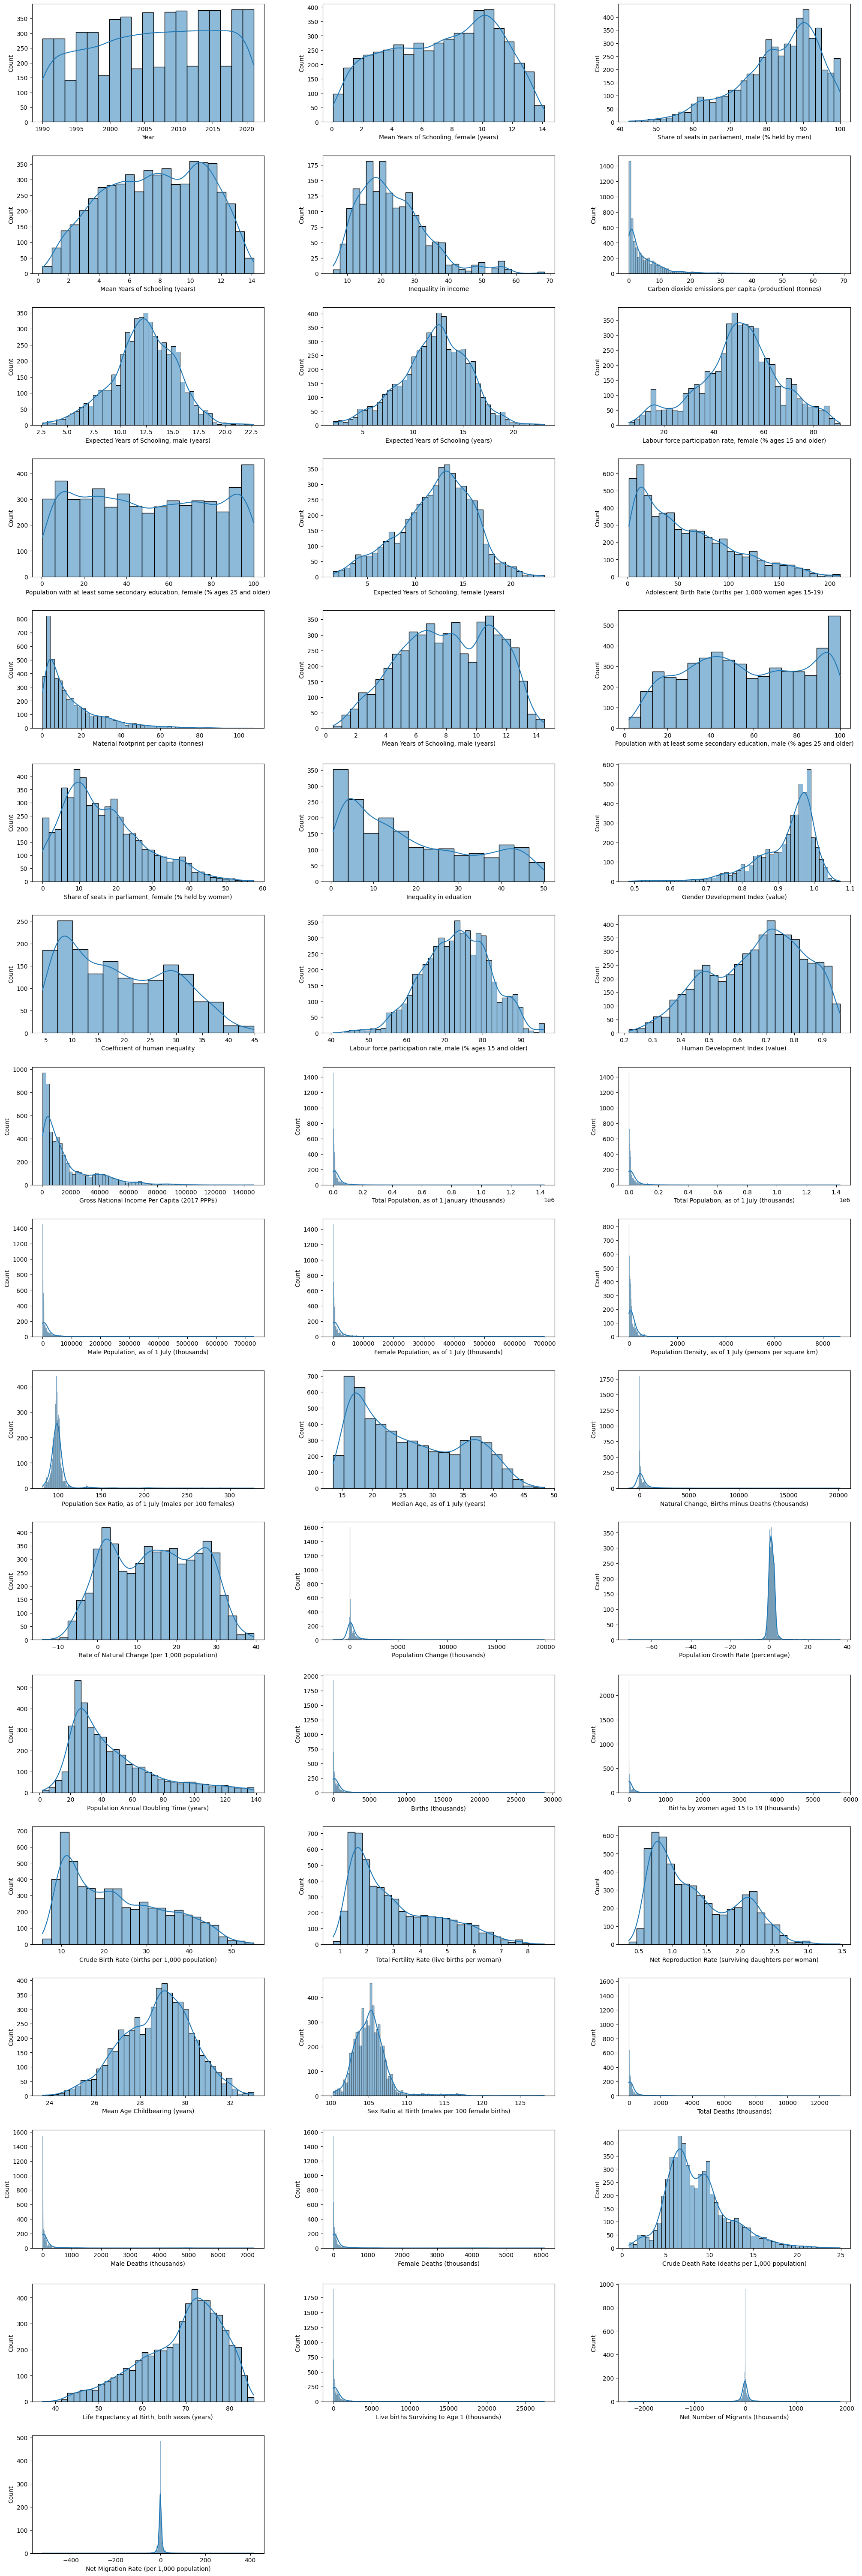

In [38]:
def data_histogram(df,figsize=(10, 15),histogram_fig_col=None,gridspec_kw={'wspace': 0.1, 'hspace': 0.1}):

   # Select numeric columns (integer and float types)
   numeric_columns = df.select_dtypes(include=['number']).columns

   # Calculate the square root of the number of plots to find the closest square layout
   if histogram_fig_col is None:
    cols = int(math.sqrt(len(numeric_columns)))  # Define the number of columns for the grid
   else:
    cols = histogram_fig_col
   rows = len(numeric_columns) // cols + (len(numeric_columns) % cols > 0)  # Calculate the number of rows needed

   # constrained_layout=True automatically adjusts layout
   fig, axes = plt.subplots(rows, cols, figsize=figsize,constrained_layout=True,gridspec_kw=gridspec_kw)
   fig_width, fig_height = fig.get_size_inches()

   # Flatten the axes array for easy iteration
   axes = axes.flatten()

   # Plotting each attribute in the grid
   for i, column in enumerate(numeric_columns):
        sns.histplot(df[column], kde=True, ax=axes[i])
        #axes[i].set_title(column,fontsize=(fig_height * 2)/(rows+1))

   # Remove any unused subplots
   for j in range(i + 1, len(axes)):
       fig.delaxes(axes[j])

   axes.reshape(rows, cols)
   plt.show()

data_histogram(data,figsize=(20, 60),histogram_fig_col=3)

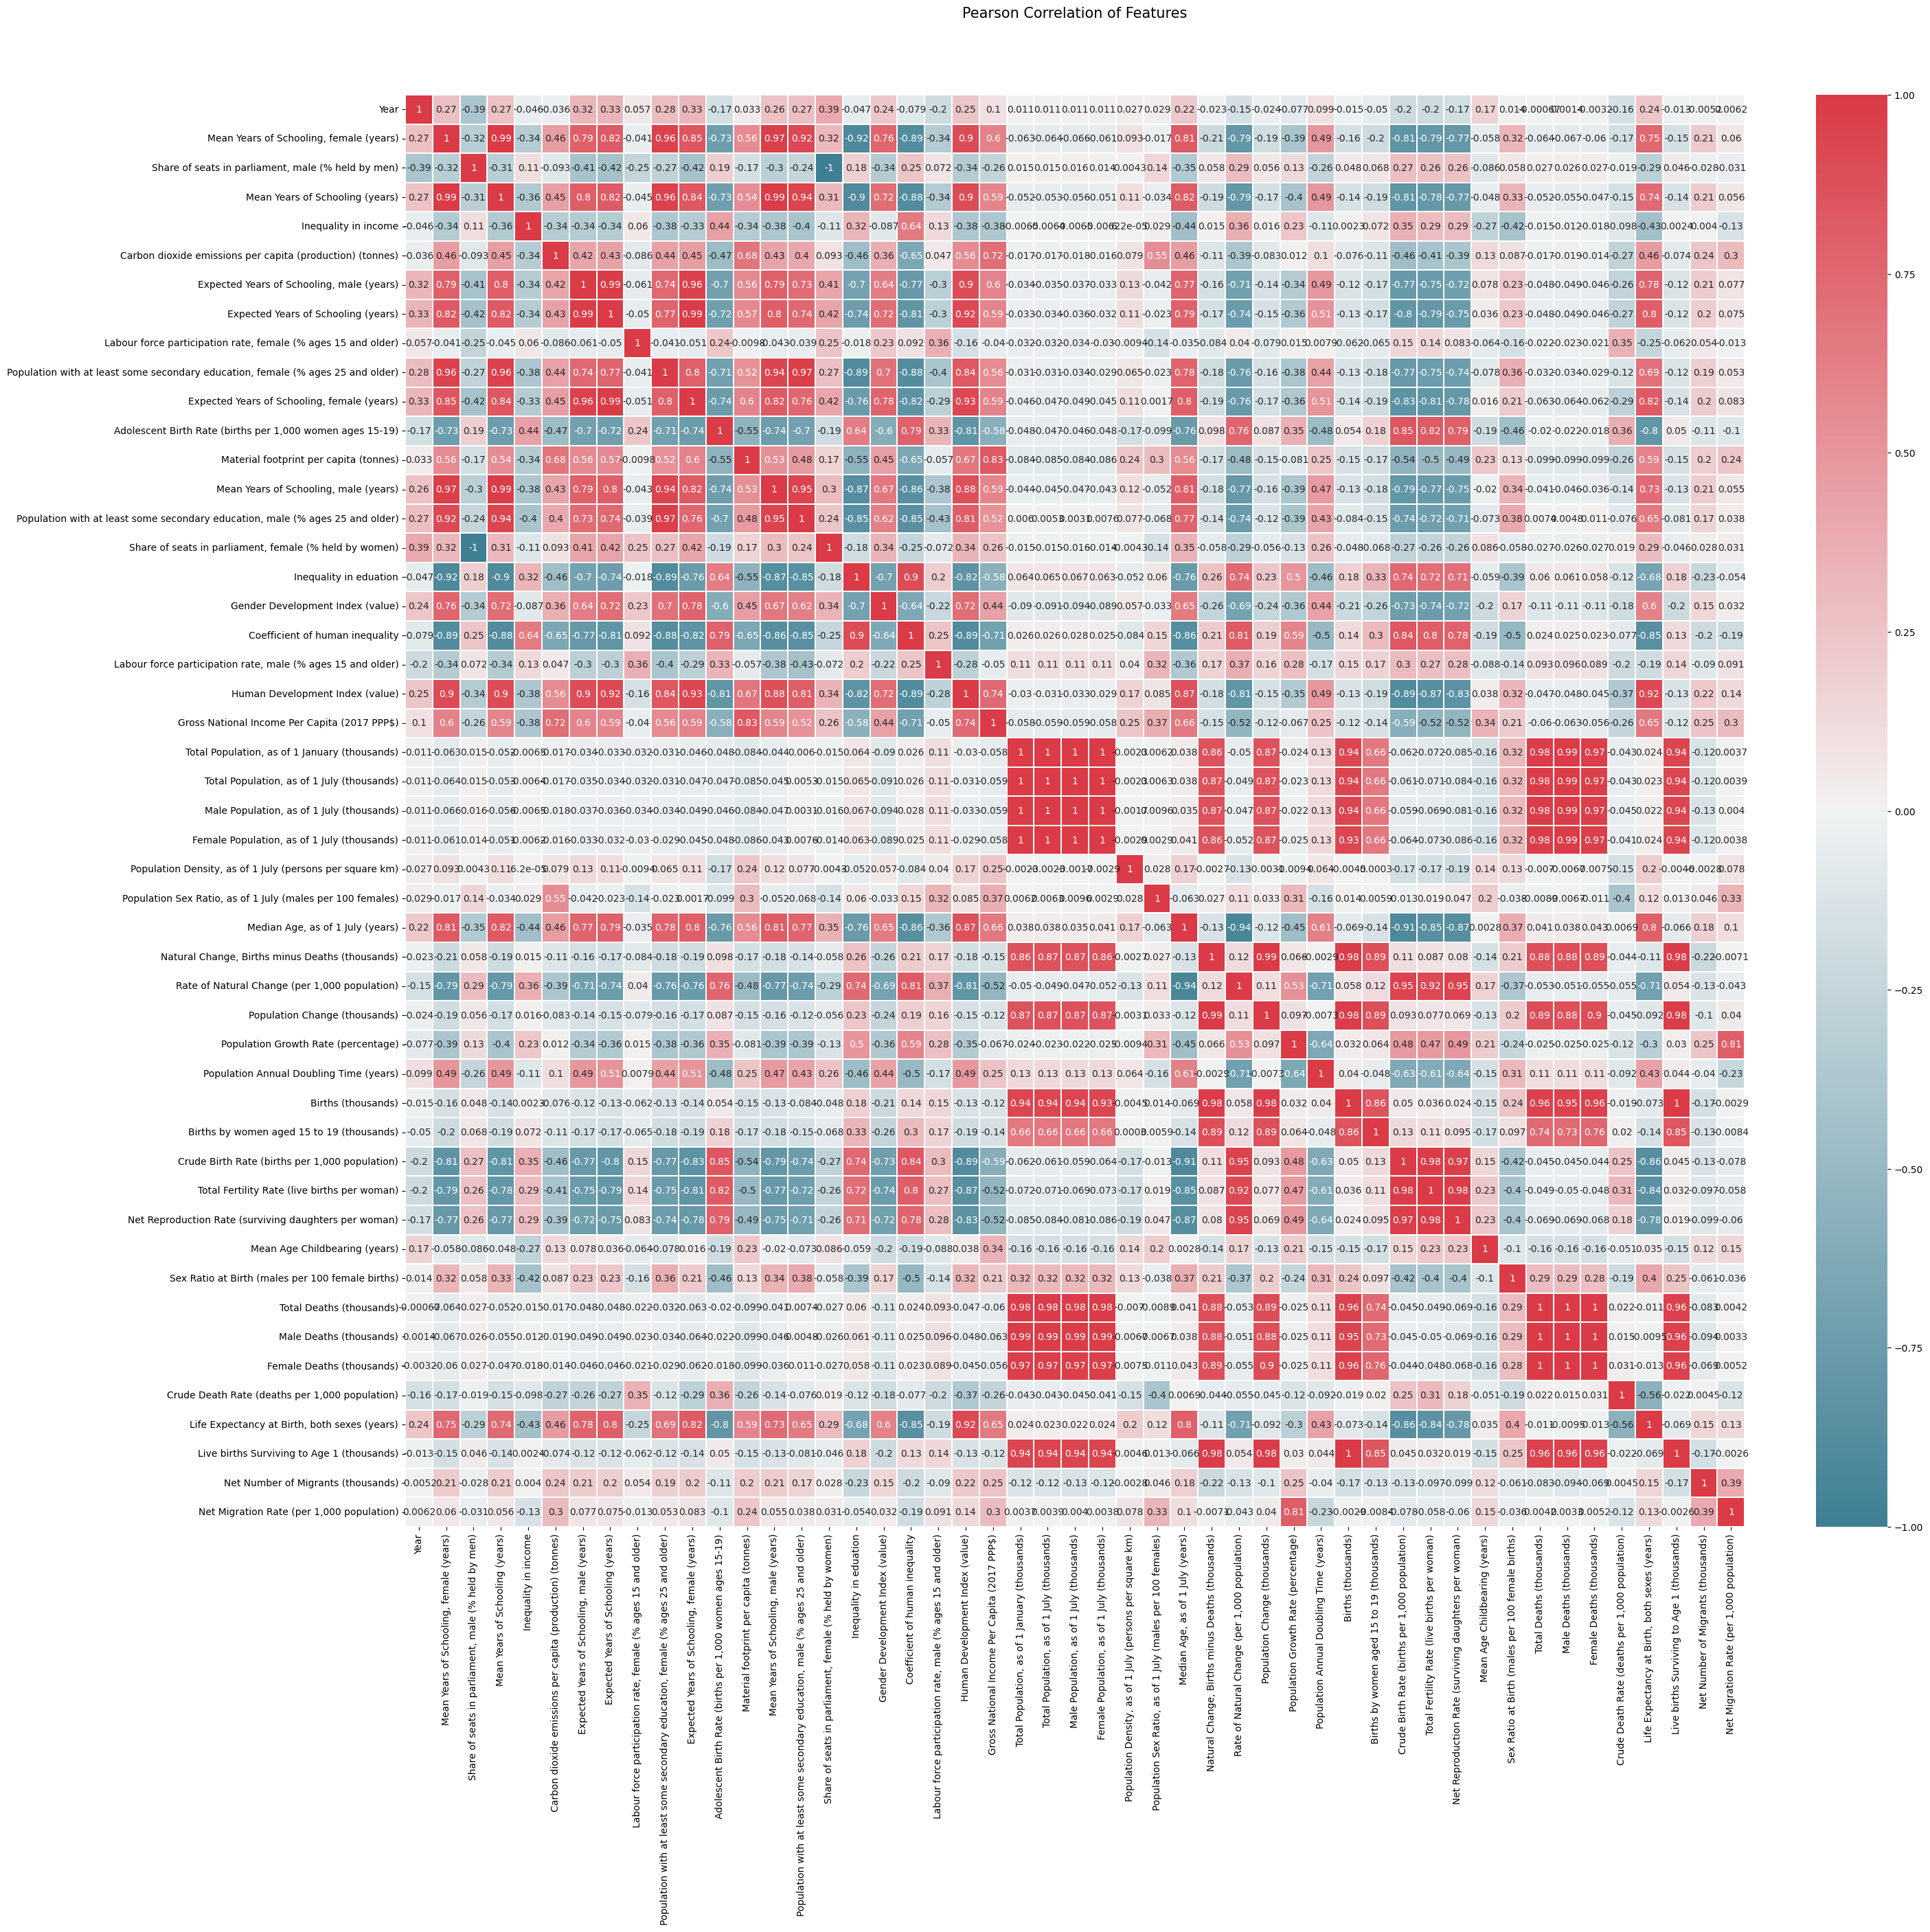

In [51]:
# Get the correlation between different features
def correlation_heatmap(df,figsize=(28,28)):

    _ , ax = plt.subplots(figsize = figsize,constrained_layout=True)
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        df.corr(numeric_only=True),
        cmap = colormap,
        square=True,
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
    )

    # Optionally, you can set the aspect ratio of the heatmap to make it more readable
    ax.set_aspect(aspect="auto")  # This adjusts the aspect ratio to fit the figure size
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.show()

correlation_heatmap(data)

In [ ]:
from sklearn.model_selection import train_test_split

random_state = 42
test_size=0.2

X_train, X_test, y_train, y_test = train_test_split(
    data['email'],
    data['label'],
    test_size=test_size,
    random_state=random_state
)